# Fandango Movie Ratings
_Author: Zeth De Luna &mdash; August 26, 2020_

In this project, we'll be analyzing data collected on movies released in 2016 and 2017 and critique [Fandango](https://www.fandango.com/)'s former practice of rating movies on a 5 star scale. (Now, the ratings seen on Fandango are the "Tomatometer" and "Audience Score" produced by [Rotten Tomatoes](https://www.rottentomatoes.com/)).

In October 2015, a data journalist named Walt Hickey wrote [an article](https://fivethirtyeight.com/features/fandango-movies-ratings/) analyzing movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest. Fandango is a popular website that aggregates movie ratings. Fandango used to display a 5-star rating system on their website, where the minimum ratings is 0 stars and the maximum rating is 5 stars.

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. Here's what he found:
* The actual rating was almost always rounded up to the nearest half star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars.
* In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
* For one movie rating, the rounding off was completely off. The movie had a real rating of 4, but the website displayed a rating of 5 stars.

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. 

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Understanding the Data

One of the best ways to figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics before and after the analysis. Walt Hickey made the data he collected publicly available on [his GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango) (data for 2015). One of [Dataquest's](https://www.dataquest.io/?utm_source=google&utm_medium=cpc&matchtype=e&device=c&utm_campaign=brand&campaignid=2083591861&adgroupid=75850930719&adid=376612070057&gclid=CjwKCAjwr7X4BRA4EiwAUXjbtys1C-98RVGcOp9r4tA-zbn15M5RZqfQk5GlpcoCv_nBZ4wSoKHcGRoCxQYQAvD_BwE) team members collected movie ratings data for movies released in 2016 and 2017, available [here](https://github.com/mircealex/Movie_ratings_2016_17). We'll use these datasets to analyze the rating system's characteristics _after_ Hickey's analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
scores_15 = pd.read_csv('fandango_score_comparison.csv')
scores_1617 = pd.read_csv('movie_ratings_16_17.csv')

To make data on Fandango's ratings easily accessible, we'll isolate the columns relevant to Fandango ni separate variables.

In [3]:
fand_2015_columns = ['FILM',
                    'Fandango_Stars',
                    'Fandango_Ratingvalue',
                    'Fandango_votes',
                    'Fandango_Difference']
fandango_1415 = scores_15.loc[:, fand_2015_columns].copy()

fand_1617_columns = ['movie', 'year', 'fandango']
fandango_1617 = scores_1617.loc[:, fand_1617_columns].copy()

In [4]:
fandango_1415.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [5]:
fandango_1617.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Recall that our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. The population of interest for our analysis consists of all the movie ratings on Fandango. 

Since we're interested in seeing if the parameters of the population have changed after Hickey's analysis, we're interested in samples of this population from before and after Hickey's analysis.

The timeframes of the data we're working with fit what we want: Hickey's data was collected before the analysis and Dataquest's data was collected in the years after the analysis. However, we'll need to make sure that the samples are representative of the population (the movies), otherwise we would end our analysis with large sampling errors and wrong conclusions.

From Hickey's article and the `README.md` on [Hickey's GitHub repository](https://github.com/fivethirtyeight/data/tree/master/fandango), he stated that he chose movies based on the following criteria:
* The movie must have at least 30 fan reviews on Fandango
* The movie must have been released in 2015

The first criteria from above suggests that the sample is not random because not every movie had the same chance of being included in the sample (movies with under 30 ratings or not released in 2015 had no chance at all). Additionally, since the selected movies are limited to the year 2015, this sample will be subject to temporal trends. For example, the film industry might have had a bad year in 2015 in terms of critic/user reviews, relative to other years.

Given this information, it seems unlikely that this sample&mdash;the data stored in `fandango_score_comparison.csv`&mdash;is representative of the entire population. 

From the `README.md` on [Dataquest's repository](https://github.com/mircealex/Movie_ratings_2016_17), the data collector chose movies based on these criteria:
* The movie must have been released in 2016 and 2017
* The movie must be considered one of the most popular movies, i.e. "with a significant number of votes" (no exact value was stated).

Similar to the dataset from Hickey's analysis, this dataset is subject to temporal trends and is unlikely that this sample&mdash;the data stored in `movie_ratings_16_17.csv`&mdash;is representative of the entire population.

## A New Approach
At this point, we have at least two alternatives: either we collect new data, or we change the goal of our analysis by placing some limitations on it.

The faster of the two options is to change our goal, so we'll do that (also, as we stated in the beginning, Fandango no longer uses the star rating system so it would be impossible to collect new data).

To make use of the data currently available to us, we'll need to tweak the goal of our analysis so that:
* The population of interest changes and the samples we currently work with become more representative
* The new goal is still a fairly good proxy for our initial goal, which was to determine whether there has been any change in Fandango's rating system after Hickey's analysis

Recall that our old goal was to determine whether Fandango's rating system before Hickey's analysis differs from their rating system after the analysis. One way to make our data useful is to narrow down on the movies' timeframe and popularity. We can change our population of interest from all movies to just the most popular movies in 2015 and 2016.

Our new goal is to determine whether there's any difference between Fandango's ratings for the most popular movies in 2015 (before Hickey's analysis) and their ratings for the most popular movies in 2016 (after Hickey's analysis). With this new goal, we'll be able to utilize the data we have while still being able to answer our original question.

## Isolating the Samples
With the new goal, we now have two populations that we want to describe and compare with each other:
1. Fandango's ratings for popular movies released in 2015
2. Fandango's ratings for popular movies released in 2016

"Popular" is a bit vague, so we'll follow Hickey's method and consider a movie to be popular only if it has at least 30 fan ratings of Fandango's website.

Before we move on further, let's double check our data again to see if they're representative samples for popular movies. 

The documentation for the data on movies released in 2015 states that the data contains only movies with at least 30 fan ratings, but we'll do a simple check just to make sure.

In [6]:
# count movies from 2015 that have less than 30 fan ratings
count_less_30 = fandango_1415[fandango_1415['Fandango_votes'] < 30].shape[0]
print('Movies with Less Than 30 Fan Reviews: {}'.format(count_less_30))

Movies with Less Than 30 Fan Reviews: 0


One easy way to check the data on 2016 movies is to randomly sample 10 movies from the data and check online if they have at least 30 fan ratings. Since the ratings system on Fandango is now run by Rotten Tomatoes, we'll check the Rotten Tomatoes [website](https://www.rottentomatoes.com/) for the number of fan reviews.

In [7]:
# isolate movies from 2016
fandango_16 = fandango_1617[fandango_1617['year'] == 2016].copy()

# select random sample from fandango_16
fandango_16.sample(10, random_state=24)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
172,The Duel,2016,3.5
31,Captain America: Civil War,2016,4.5
12,Arrival,2016,4.0
16,Bad Santa 2,2016,3.5
197,The Take (Bastille Day),2016,4.0
63,Gods of Egypt,2016,3.5
195,The Shallows,2016,4.0
140,Rogue One: A Star Wars Story,2016,4.5
95,Lights Out,2016,4.0


As of August, 2020, these are the amounts of fan ratings for the randomly selected movies:

|             Movie             | Fan Ratings |
|-------------------------------|-------------|
| 10 Cloverfield Lane           | 60868       |
| The Duel                      | 1146        |
| Captain America: Civil War    | 180062      |
| Arrival                       | 83227       |
| Bad Santa 2                   | 10354       |
| The Take (Bastille Day)       | 3809        |
| Gods of Egypt                 | 31806       |
| The Shallows                  | 32444       |
| Rogue One: A Star Wars Story  | 104581      |
| Lights Out                    | 27459       |

For good measure, let's do another random sample.

In [8]:
fandango_16.sample(10, random_state=2)

,movie,year,fandango
28,Busanhaeng,2016,4.5
135,Race,2016,4.5
40,Deadpool,2016,4.5
11,Approaching the Unknown,2016,3.5
55,Finding Dory,2016,4.5
2,A Cure for Wellness,2016,3.0
143,Sing,2016,4.5
34,Central Intelligence,2016,4.5
101,Loving,2016,4.0
176,The Founder,2016,4.0


Here are the amount of ratings for these movies, as of August, 2020:

|           Movies            | Fan Ratings |
|-----------------------------|-------------|
| Busanhaeng (Train to Busan) | 12595       | 
| Race                        | 14977       |
| Deadpool                    | 187422      |
| Approaching the Unknown     | 1539        |
| Finding Dory                | 181940      |
| A Cure for Wellness         | 11536       |
| Sing                        | 39465       |
| Central Intelligence        | 54341       |
| Loving                      | 19675       |
| The Founder                 | 32351       |

100% of the movies in our samples are popular by our standards. So, we can move on with our analysis with a bit more confidence.

We already isolated the movies in Dataquest's sample to movies released in 2016. Let's do the same for Hickey's sample, but for movies released in 2015.

You may have noticed that `fandango_1415` doesn't have a year column and that the year that the movie was released is stored after each movie title in the `FILM` column. Before we isolate the movies from 2015, it would be easier to create a new column in this dataframe, called `Year`, that contains the release year of each corresponding movie.

In [9]:
# extract years from FILM column and create 'Year' column
fandango_1415['Year'] = (fandango_1415['FILM']
                             .apply(lambda title: title[-5:-1])
                        )

In [10]:
fandango_1415['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

We can see that there are 17 movies in the dataset that were released in 2014. We just want those released in 2015, so we'll isolate those movies and create a new dataframe.

In [11]:
# create new dataframe with just 2015 movies
fandango_15 = fandango_1415[fandango_1415['Year'] == '2015'].copy()

In [12]:
fandango_15['Year'].value_counts()

2015    129
Name: Year, dtype: int64

We have arrived at two dataframes for movies released in 2015 and 2016:
* 2015 Movies: `fandango_15`
* 2016 Movies: `fandango_16`

Now that we have two datasets that we can work with, we can start our analysis. One more time: our goal is to determine whether there are any differences between Fandango's ratings for popular movies released in 2015 and in 2016.

## Comparing Distributions of Movie Ratings

Let's begin our analysis by making a high-level comparison between the shapes of the distributions of movie ratings for both samples.

In [13]:
fandango_15.head(1)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015


In [14]:
fandango_16.head(1)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5


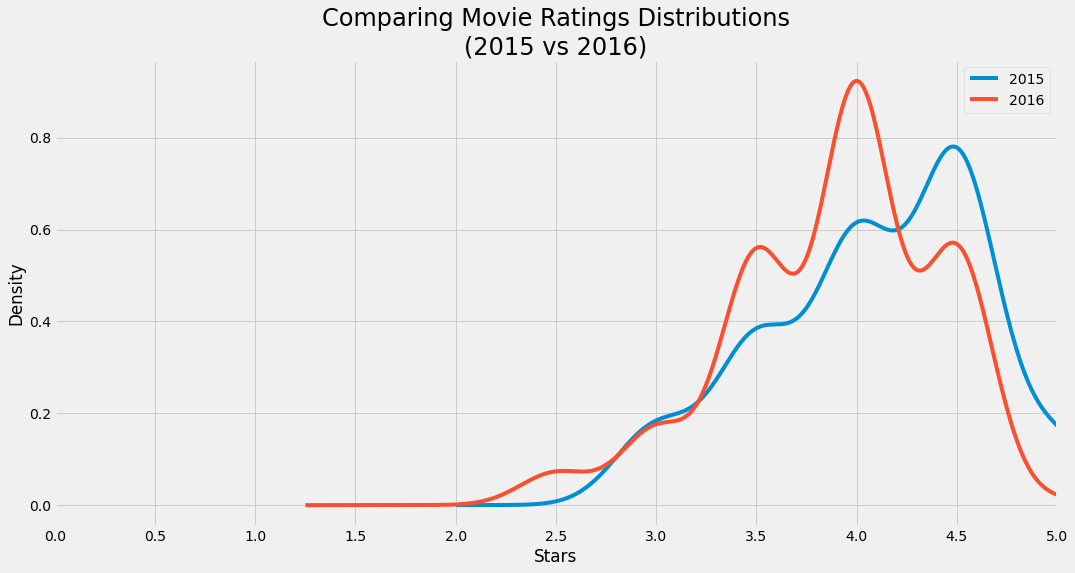

In [15]:
# generate kernel density plots for the fandango ratings in
# the two datasets
plt.style.use('fivethirtyeight')

(fandango_15['Fandango_Stars']
     .plot.kde(label='2015', legend=True, figsize=(16,8)))

(fandango_16['fandango']
    .plot.kde(label='2016', legend=True))

plt.title('Comparing Movie Ratings Distributions\n(2015 vs 2016)',
          fontsize=24)
plt.xlabel('Stars')
plt.xlim(0, 5)
plt.xticks(np.arange(0, 5.1, 0.5))
plt.show()

Instantly, we can see that both datasets are left skewed. However, the data from 2016 is shifted slightly to the left compared to the data from 2015.

The left skew of the distributions suggests that movies on Fandango tend to be given high ratings. Given that Fandango also sells tickets, one could argue that Fandango bumps up the ratings of movies so that they could sell more tickets. We could collect more data to dig deeper into that hypothesis, but for the scope of this project we'll leave it at that.

A positive sign is that the distribution for the movie ratings in the following year, 2016, are shifted slightly to the left. This shows that the overall ratings for movies in 2016 were lower and could indicate that Fandango implemented changes in their movie rating system.

By comparing the ratings distributions we learned that movies in 2016 were rated slightly lower than movies in 2015.

## Comparing Frequency of Movie Ratings
While comparing the distributions with the help of the kernel density plots was a great start, we need to analyze more granular information. 

Let's examine the frequency of each rating (i.e. 5.0, 4.5, 4.0, etc.) for both years. Since the two datasets don't have the same amount of movies, it would be best to show the frequencies in terms of percentages.

In [16]:
print('2015 Movie Ratings\n' + '-'*24)
print((fandango_15['Fandango_Stars']
           .value_counts(normalize=True)
           .sort_index()
      ) * 100)

print('-'*48 + '\n')

print('2016 Movie Ratings\n' + '-'*24)
print((fandango_16['fandango']
           .value_counts(normalize=True)
           .sort_index()
      ) * 100)

2015 Movie Ratings
------------------------
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64
------------------------------------------------

2016 Movie Ratings
------------------------
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


In [17]:
# percent change in 4.5 rating frequency from 2015 to 2016
pct_change1 = 24.607330 - 37.984486

# percent change in 5.0 rating frequency from 2015 to 2016
pct_change2 = 0.523560 - 6.976744

print('Change in Frequency for 4.5 Ratings: {}'.format(pct_change1))
print('Change in Frequency for 5.0 Ratings: {}'.format(pct_change2))

Change in Frequency for 4.5 Ratings: -13.377155999999996
Change in Frequency for 5.0 Ratings: -6.453184


We can see that in 2016, the frequency of high ratings is significantly lower than in 2015. The frequency of 4.5 ratings decreased by about 13% and the frequency of 5.0 ratings decreased by about 6.5%, leaving only less than 1% of movies being given 5.0 stars.

The lowest rating is also lower in 2016, with about 3% of movies receiving a rating of 2.5, while the lowest rating for a movie in 2015 was 3.0. 

By observing the differences between the two frequency table, we can confirm that there is indeed a clear difference between the two distributions.

While the frequency of the highest ratings decreased, there was an increase in the number of 4.0 and 3.5 ratings, making the direction of change less clear.

We'll need to take a few summary statistics to get a more precise picture about the direction of change.

## Determining the Direction of Change
To determine the direction of change between the two datasets, we'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

In [18]:
# calculate mean, median, and mode for both datasets
ratings_15_mean = fandango_15['Fandango_Stars'].mean()
ratings_15_median = fandango_15['Fandango_Stars'].median()
ratings_15_mode = fandango_15['Fandango_Stars'].mode()[0]

ratings_16_mean = fandango_16['fandango'].mean()
ratings_16_median = fandango_16['fandango'].median()
ratings_16_mode = fandango_16['fandango'].mode()[0]

# create new dataframe containing the values above
stats = pd.DataFrame()
stats['2015'] = [ratings_15_mean, ratings_15_median, ratings_15_mode]
stats['2016'] = [ratings_16_mean, ratings_16_median, ratings_16_mode]
stats.index = ['mean', 'median', 'mode']

In [19]:
stats

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


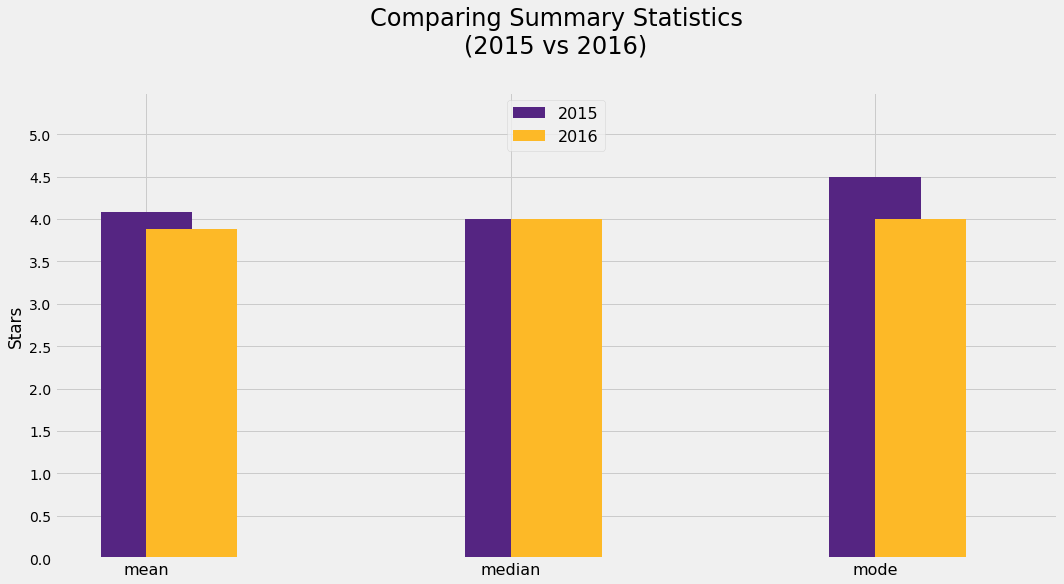

In [29]:
# generate a bar plot comparing the summary statistics
plt.style.use('fivethirtyeight')
purple = (85/255, 37/255, 130/255)
gold = (253/255, 185/255, 39/255)

stats['2015'].plot.bar(color=purple, align='center', 
                       label='2015', width=0.25)
stats['2016'].plot.bar(color=gold, align='edge',
                       label='2016', width=0.25,
                       rot=0, figsize=(16, 8))

plt.title('Comparing Summary Statistics\n(2015 vs 2016)',
          fontsize=24, y=1.07)
plt.xticks(fontsize=16)
plt.ylim(0, 5.5)
plt.yticks(np.arange(0, 5.1, 0.5))
plt.ylabel('Stars')
plt.legend(fontsize=16, loc='upper center')
plt.show()

3 takeaways from the grouped bar plot:
* The rating mean decreased slightly
* The rating median stayed the same
* The rating mode (most frequent) decreased by half a star

By comparing this with the kernel density plot that we produce earlier, we can confirm that on average, popular movies released in 2016 had slightly lower ratings than popular movies released in 2015.

## Conclusion
Our analysis has showed that there is a slight difference between Fandango's ratings for popular movies before Hickey's analysis and after his analysis. More specifically, we found that after Hickey's analysis, popular movies on Fandango were rated lower than before. 

While we can't be 100% sure on what caused the change in movie ratings, the data supports the idea that it was caused by Fandango fixing the biased rating system after Hickey's analysis.